In [ ]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
import statsmodels.api as sm
from sklearn import preprocessing
'exec(% matplotlib inline)'
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sn


**Data Preparation:**

**Loading the Dataset**

In [ ]:
# Load and display basic information about the dataset
disease_df = pd.read_csv("framingham.csv")
disease_df.drop(['education'], inplace=True, axis=1)
disease_df.rename(columns={'male': 'Sex_male'}, inplace=True)

# removing NaN / NULL values
disease_df.dropna(axis = 0, inplace = True)

# Display the first few rows of the dataset and its shape
print(disease_df.head())
print("Dataset Shape:", disease_df.shape)

# Display the distribution of the target variable
print("Distribution of TenYearCHD:")
print(disease_df['TenYearCHD'].value_counts())


   Sex_male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0         1   39              0         0.0     0.0                0   
1         0   46              0         0.0     0.0                0   
2         1   48              1        20.0     0.0                0   
3         0   61              1        30.0     0.0                0   
4         0   46              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           

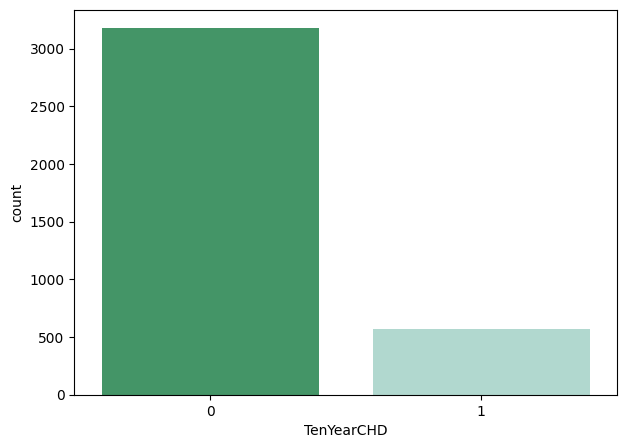

In [ ]:
# Plot the count of patients affected with CHD
plt.figure(figsize=(7, 5))
sn.countplot(x='TenYearCHD', data=disease_df, palette="BuGn_r")
plt.show()


**Training and Test Sets: Splitting Data | Normalization of the Dataset**:

In [ ]:
# Prepare the features (X) and target variable (y)
X = np.asarray(disease_df[['age', 'Sex_male', 'cigsPerDay', 'totChol', 'sysBP', 'glucose']])
y = np.asarray(disease_df['TenYearCHD'])

# Normalization of the dataset
X = preprocessing.StandardScaler().fit(X).transform(X)

# Train-and-Test -Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

# Display the shape of training and test sets
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)


Train set: (2625, 6) (2625,)
Test set: (1126, 6) (1126,)


**Modeling of the Dataset**



**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Fit Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# Calculate and print the accuracy of the Logistic Regression model
dt_score = accuracy_score(y_test, y_pred) * 100
print('Accuracy of the Logistic Regression model is =', dt_score)

Accuracy of the Logistic Regression model is = 84.90230905861456


**Random Forest Classifier**




In [ ]:
# Use Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Calculate and print the accuracy of the Random Forest model
score = rf.score(X_test, y_test) * 100
print('Accuracy of the Random Forest model is = ', score)


Accuracy of the Random Forest model is =  83.92539964476022


**k-Nearest Neighbors Classifier:**

In [ ]:
# k-Nearest Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

# Create and train the k-Nearest Neighbors model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn.predict(X_test)

# Calculate and print the accuracy of the k-Nearest Neighbors model
knn_score = knn.score(X_test, y_test) * 100
print('Accuracy of the k-Nearest Neighbors model is =', knn_score)

Accuracy of the k-Nearest Neighbors model is = 83.03730017761988


**Using Confusion Matrix to find the Accuracy of the model :**


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       951
           1       0.61      0.08      0.14       175

    accuracy                           0.85      1126
   macro avg       0.73      0.54      0.53      1126
weighted avg       0.82      0.85      0.80      1126

k-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       951
           1       0.36      0.11      0.17       175

    accuracy                           0.83      1126
   macro avg       0.61      0.54      0.54      1126
weighted avg       0.78      0.83      0.79      1126

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       951
           1       0.42      0.10      0.17       175

    accuracy                           0.84      1126
   ma

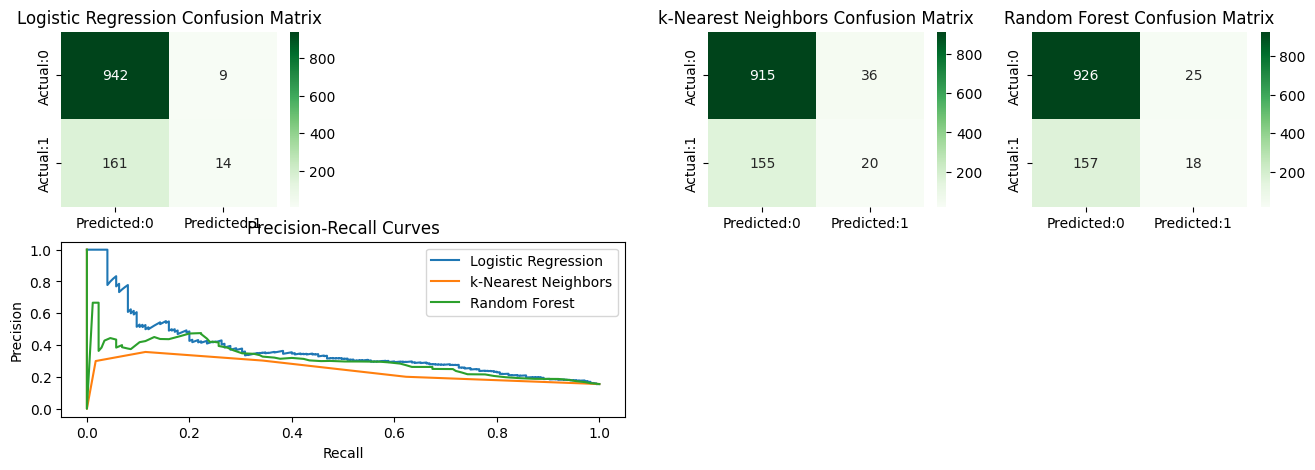

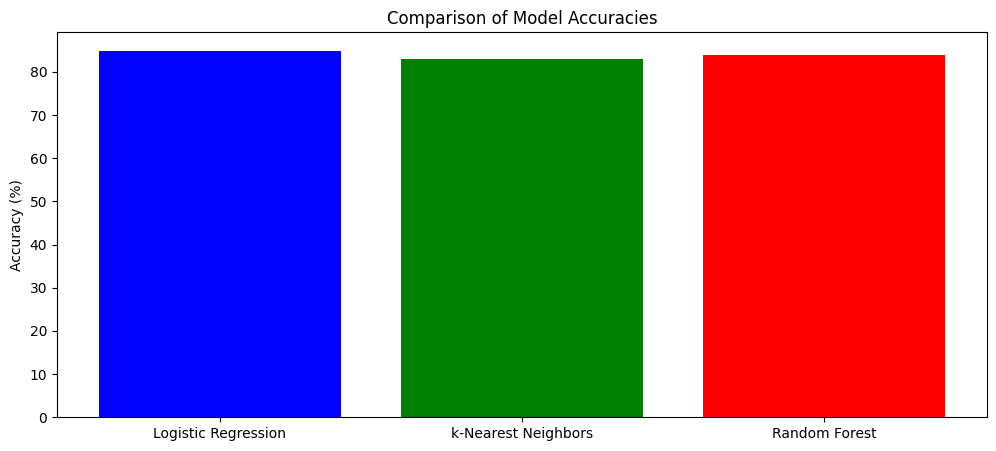

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve

# Logistic Regression Confusion Matrix
cm_logreg = confusion_matrix(y_test, y_pred)
conf_matrix_logreg = pd.DataFrame(data=cm_logreg, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])

# Plot the Logistic Regression confusion matrix using a heatmap
plt.figure(figsize=(16, 5))
plt.subplot(2, 4, 1)
sn.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap="Greens")
plt.title('Logistic Regression Confusion Matrix')

# k-Nearest Neighbors Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
conf_matrix_knn = pd.DataFrame(data=cm_knn, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])

# Plot the k-Nearest Neighbors confusion matrix using a heatmap
plt.subplot(2, 4, 3)
sn.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap="Greens")
plt.title('k-Nearest Neighbors Confusion Matrix')

# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test, rf.predict(X_test))
conf_matrix_rf = pd.DataFrame(data=cm_rf, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])

# Plot the Random Forest confusion matrix using a heatmap
plt.subplot(2, 4, 4)
sn.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap="Greens")
plt.title('Random Forest Confusion Matrix')

# Precision-Recall Curves
plt.subplot(2, 2, 3)
precision_logreg, recall_logreg, _ = precision_recall_curve(y_test, logreg.predict_proba(X_test)[:, 1])
plt.plot(recall_logreg, precision_logreg, label='Logistic Regression')

precision_knn, recall_knn, _ = precision_recall_curve(y_test, knn.predict_proba(X_test)[:, 1])
plt.plot(recall_knn, precision_knn, label='k-Nearest Neighbors')

precision_rf, recall_rf, _ = precision_recall_curve(y_test, rf.predict_proba(X_test)[:, 1])
plt.plot(recall_rf, precision_rf, label='Random Forest')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend()

# Display details for each confusion matrix
print('Logistic Regression Classification Report:')
print(classification_report(y_test, y_pred))

print('k-Nearest Neighbors Classification Report:')
print(classification_report(y_test, y_pred_knn))

print('Random Forest Classification Report:')
print(classification_report(y_test, rf.predict(X_test)))

# Bar chart to compare model accuracies
models = ['Logistic Regression', 'k-Nearest Neighbors', 'Random Forest']
accuracies = [accuracy_score(y_test, y_pred) * 100, knn_score, score]

plt.figure(figsize=(12, 5))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Model Accuracies')
plt.show()
